In [2]:
import yfinance as yf
from yahoo_fin.stock_info import get_data
import pandas as pd
import matplotlib as plt
import numpy as np



In [3]:
# Downloading the stock data
amazon_data = yf.download("AMZN", start="2013-01-01", end="2023-12-04", interval="1d")
nvda_data = yf.download("NVDA", start="2013-01-01", end="2023-12-04", interval="1d")
msft_data = yf.download("MSFT", start="2013-01-01", end="2023-12-04", interval="1d")
aapl_data = yf.download("AAPL", start="2013-01-01", end="2023-12-04", interval="1d")
googl_data = yf.download("GOOGL", start="2013-01-01", end="2023-12-04", interval="1d")

# Combining the closing prices into one DataFrame
combined_data = pd.DataFrame({
    'AMZN_Close': amazon_data['Close'],
    'NVDA_Close': nvda_data['Close'],
    'MSFT_Close': msft_data['Close'],
    'AAPL_Close': aapl_data['Close'],
    'GOOGL_Close': googl_data['Close']
})

# Cleaning up the data
# Droping any rows with missing values
combined_data.dropna(inplace=True)
filled_data = combined_data.fillna(method='bfill')


combined_data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
C:\Users\ebehnia\AppData\Local\Temp\ipykernel_7272\1276337309.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled_data = combined_data.fillna(method='bfill')


,AMZN_Close,NVDA_Close,MSFT_Close,AAPL_Close,GOOGL_Close
Date,,,,,
2013-01-02,12.865500,3.180000,27.620001,19.608213,18.099348
2013-01-03,12.924000,3.182500,27.250000,19.360714,18.109859
2013-01-04,12.957500,3.287500,26.740000,18.821428,18.467718
2013-01-07,13.423000,3.192500,26.690001,18.710714,18.387136
2013-01-08,13.319000,3.122500,26.549999,18.761070,18.350851
...,...,...,...,...,...
2023-11-27,147.729996,482.420013,378.609985,189.789993,136.410004
2023-11-28,147.029999,478.209991,382.700012,190.399994,137.199997
2023-11-29,146.320007,481.399994,378.850006,189.369995,134.990005


# Python Function to calculate basic stastics :
calculate_basic_statistics

In [4]:
# Calculating basic statistics for each stock
def calculate_basic_statistics(data):
    stats = {
        'mean': data['Close'].mean(),
        'median': data['Close'].median(),
        'std_dev': data['Close'].std(),
    }
    return stats

# Example for Amazon
amazon_stats = calculate_basic_statistics(amazon_data)
print("Amazon Stats:", amazon_stats)

# For correlation, we first need to create a combined DataFrame with closing prices
closing_prices = pd.DataFrame({
    'AMZN': amazon_data['Close'],
    'NVDA': nvda_data['Close'],
    'MSFT': msft_data['Close'],
    'AAPL': aapl_data['Close'],
    'GOOGL': googl_data['Close'],
})

# Calculate correlation matrix
correlation_matrix = closing_prices.corr()
print("Correlation Matrix:\n", correlation_matrix)



Amazon Stats: {'mean': 77.5816343858399, 'median': 79.61949920654297, 'std_dev': 52.77144942030252}
Correlation Matrix:
            AMZN      NVDA      MSFT      AAPL     GOOGL
AMZN   1.000000  0.741297  0.909426  0.866314  0.910966
NVDA   0.741297  1.000000  0.918219  0.920476  0.894883
MSFT   0.909426  0.918219  1.000000  0.985704  0.979371
AAPL   0.866314  0.920476  0.985704  1.000000  0.963009
GOOGL  0.910966  0.894883  0.979371  0.963009  1.000000


[*********************100%%**********************]  5 of 5 completed

Statistical Measures of Daily Returns:
            Mean    Median  Standard Deviation
Ticker                                        
AAPL    0.001047  0.000923            0.017925
AMZN    0.001099  0.001081            0.020615
GOOGL   0.000871  0.000831            0.017259
MSFT    0.001166  0.000852            0.016963
NVDA    0.002240  0.002003            0.028208


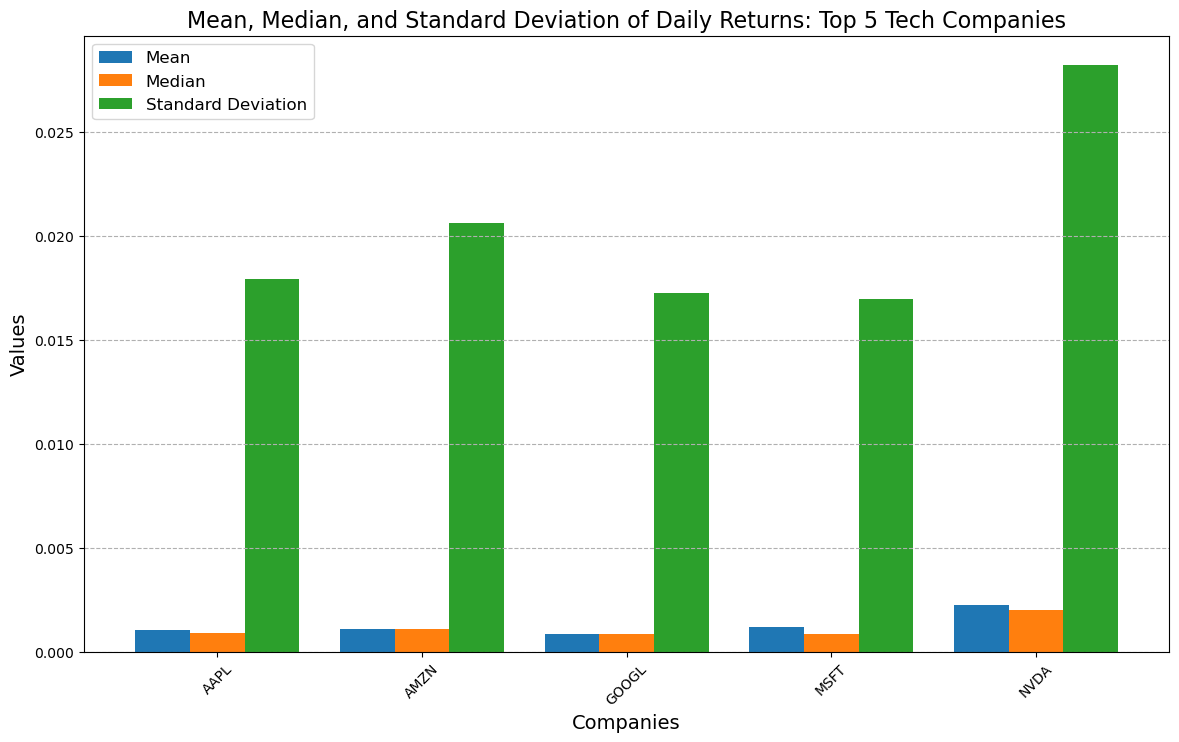

In [12]:

import matplotlib.pyplot as plt

# Define the tickers for the top 5 tech companies
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'NVDA']

# Download historical stock data
data = yf.download(tickers, start="2013-01-01", end="2023-12-04", interval="1d")['Adj Close']

# Calculate daily returns
daily_returns = data.pct_change()

# Calculate mean, median, and standard deviation for each company
stats = pd.DataFrame({
    'Mean': daily_returns.mean(),
    'Median': daily_returns.median(),
    'Standard Deviation': daily_returns.std()
})

# Print the calculated statistics
print("Statistical Measures of Daily Returns:")
print(stats)

# Plotting the statistics for comparison
stats.plot(kind='bar', figsize=(14, 8), width=0.8)

plt.title('Mean, Median, and Standard Deviation of Daily Returns: Top 5 Tech Companies', fontsize=16)
plt.ylabel('Values', fontsize=14)
plt.xlabel('Companies', fontsize=14)
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--')

plt.show()


# Annual Volitility 

In [10]:
# Calculate daily returns
amazon_returns = amazon_data['Close'].pct_change()
nvda_returns = nvda_data['Close'].pct_change()
msft_returns = msft_data['Close'].pct_change()
aapl_returns = aapl_data['Close'].pct_change()
googl_returns = googl_data['Close'].pct_change()

# Calculate annualized volatility (standard deviation of daily returns * sqrt(252))
annual_volatility = {
    'AMZN': amazon_returns.std() * (252**0.5),
    'NVDA': nvda_returns.std() * (252**0.5),
    'MSFT': msft_returns.std() * (252**0.5),
    'AAPL': aapl_returns.std() * (252**0.5),
    'GOOGL': googl_returns.std() * (252**0.5),
}


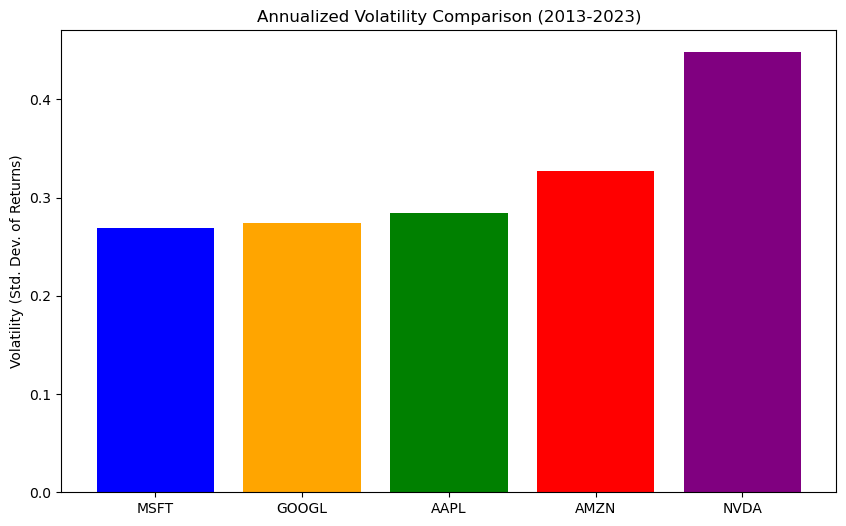

In [13]:
sorted_volatility = dict(sorted(annual_volatility.items(), key=lambda item: item[1]))

# Extracting the sorted keys and values for plotting
companies = list(sorted_volatility.keys())
volatilities = list(sorted_volatility.values())

# Plotting the sorted data
plt.figure(figsize=(10, 6))
plt.bar(companies, volatilities, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Annualized Volatility Comparison (2013-2023)')
plt.ylabel('Volatility (Std. Dev. of Returns)')
plt.show()

Nvidia (NVDA) has the highest volatility among the five stocks. Its bar is the tallest, indicating that its stock price has been the most prone to large swings. This suggests that Nvidia's stock has been the most unpredictable and may be considered the riskiest investment of the five if one associates higher volatility with higher risk.

Amazon (AMZN) also shows relatively high volatility, with its bar being the second tallest. This suggests that its stock price also experienced significant fluctuations, although less than Nvidia's.

Microsoft (MSFT) and Apple (AAPL) have similar levels of volatility, as indicated by the nearly equal height of their bars. Their stock prices have been less volatile compared to NVDA and AMZN but still showed notable price movement.

Alphabet (GOOGL) exhibits the lowest volatility among the group, as seen by the shortest bar. This implies that Alphabet's stock price has been the most stable, with the least amount of price swings compared to the others. Investors might consider GOOGL as a less risky investment based on this volatility measure.

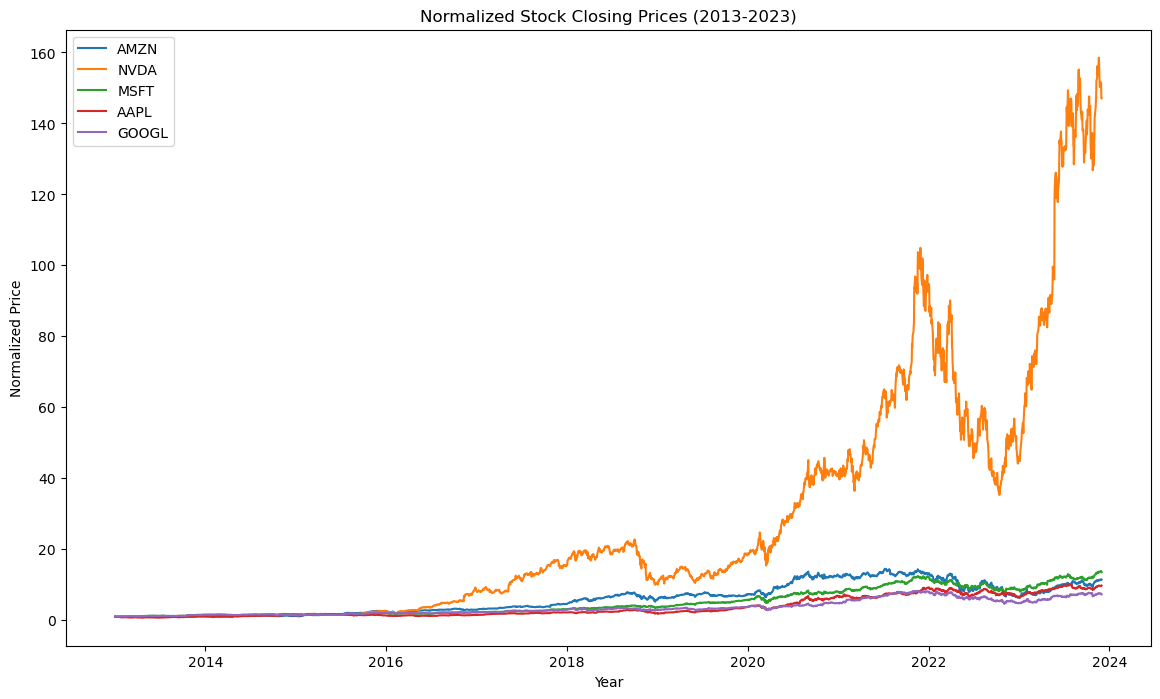

In [14]:
import matplotlib.pyplot as plt

# Normalize the closing prices
normalized_amzn = amazon_data['Close'] / amazon_data['Close'].iloc[0]
normalized_nvda = nvda_data['Close'] / nvda_data['Close'].iloc[0]
normalized_msft = msft_data['Close'] / msft_data['Close'].iloc[0]
normalized_aapl = aapl_data['Close'] / aapl_data['Close'].iloc[0]
normalized_googl = googl_data['Close'] / googl_data['Close'].iloc[0]

plt.figure(figsize=(14, 8))
plt.plot(normalized_amzn.index, normalized_amzn, label='AMZN')
plt.plot(normalized_nvda.index, normalized_nvda, label='NVDA')
plt.plot(normalized_msft.index, normalized_msft, label='MSFT')
plt.plot(normalized_aapl.index, normalized_aapl, label='AAPL')
plt.plot(normalized_googl.index, normalized_googl, label='GOOGL')
plt.legend()
plt.title('Normalized Stock Closing Prices (2013-2023)')
plt.ylabel('Normalized Price')
plt.xlabel('Year')
plt.show()




Nvidia (NVDA): The orange line, representing NVDA, shows the most significant growth over this period. It indicates that Nvidia's stock has far outperformed the others in terms of cumulative returns, with the value soaring especially after 2020 before experiencing a sharp downturn and then rising again.

Amazon (AMZN): The blue line, while showing growth, has not experienced the same dramatic increase as Nvidia. It demonstrates a steady increase over the decade, with some fluctuations.

Microsoft (MSFT), Apple (AAPL), and Alphabet (GOOGL): These stocks have followed a relatively similar trajectory, indicating moderate growth. They are less volatile compared to NVDA and have grown at a more stable rate.

Comparison: While all stocks have shown growth over this period, NVDA's performance stands out significantly, although it also shows a sharp decline at one point, which suggests a period of high volatility or a market correction. In contrast, the other stocks have shown more steady and less volatile growth.

Investment Implications: For an investor, this chart suggests that NVDA offered the highest return on investment but also came with significant risk, as evidenced by the sharp declines at certain points. The other stocks might have offered lower returns but with possibly lower risk.



In [17]:
#another method calculating volitility for practice and accuracy 

def calculate_annualized_volatility(data):
    # Calculate daily returns
    daily_returns = data['Close'].pct_change()
    
    # Calculate the standard deviation of daily returns
    std_dev = daily_returns.std()
    
    # Annualize the volatility
    annualized_volatility = std_dev * np.sqrt(252)
    
    return annualized_volatility

# Calculate the annualized volatility for each stock
amazon_volatility = calculate_annualized_volatility(amazon_data)
nvda_volatility = calculate_annualized_volatility(nvda_data)
msft_volatility = calculate_annualized_volatility(msft_data)
aapl_volatility = calculate_annualized_volatility(aapl_data)
googl_volatility = calculate_annualized_volatility(googl_data)

# Create a dictionary to hold the results
volatility_results = {
    'AMZN': amazon_volatility,
    'NVDA': nvda_volatility,
    'MSFT': msft_volatility,
    'AAPL': aapl_volatility,
    'GOOGL': googl_volatility,
}

volatility_results

{'AMZN': 0.32725068459771145,
 'NVDA': 0.4478094455038778,
 'MSFT': 0.26946238740030926,
 'AAPL': 0.2846732279637677,
 'GOOGL': 0.2739858118241829}

[*********************100%%**********************]  5 of 5 completed


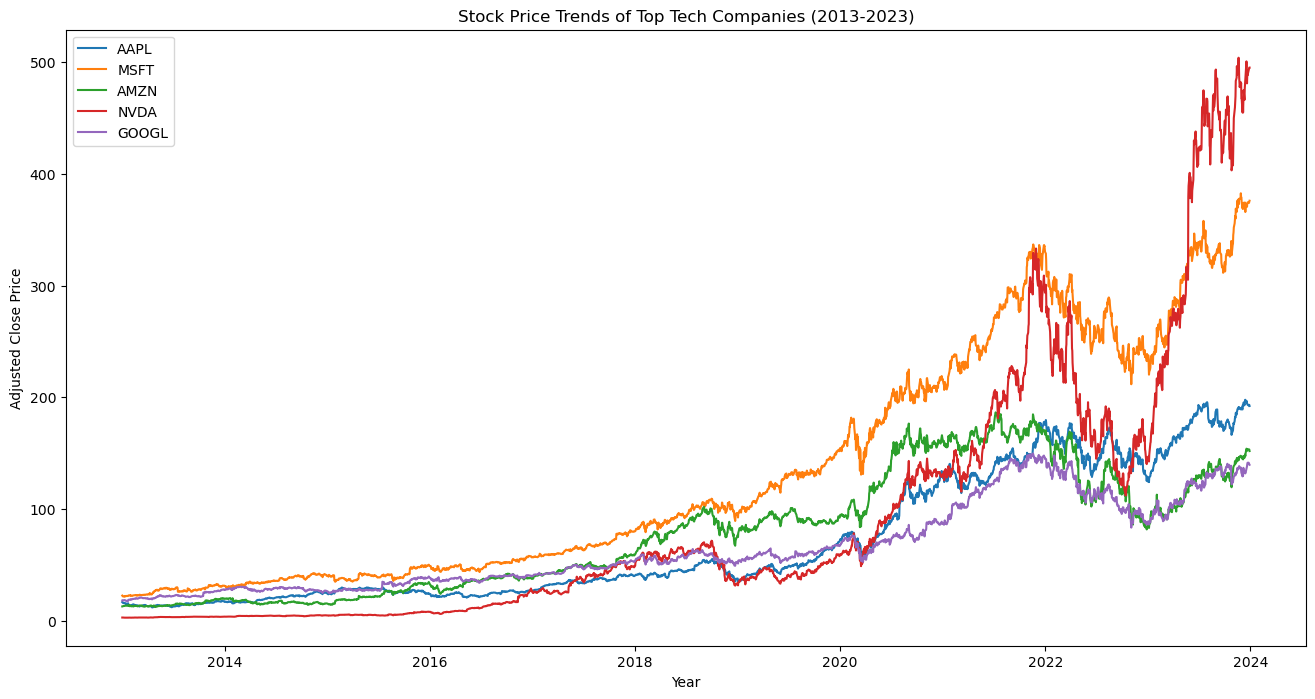

Annual Volatility (sorted):
Ticker
NVDA     0.446821
AMZN     0.326502
AAPL     0.283812
GOOGL    0.273865
MSFT     0.268613
dtype: float64


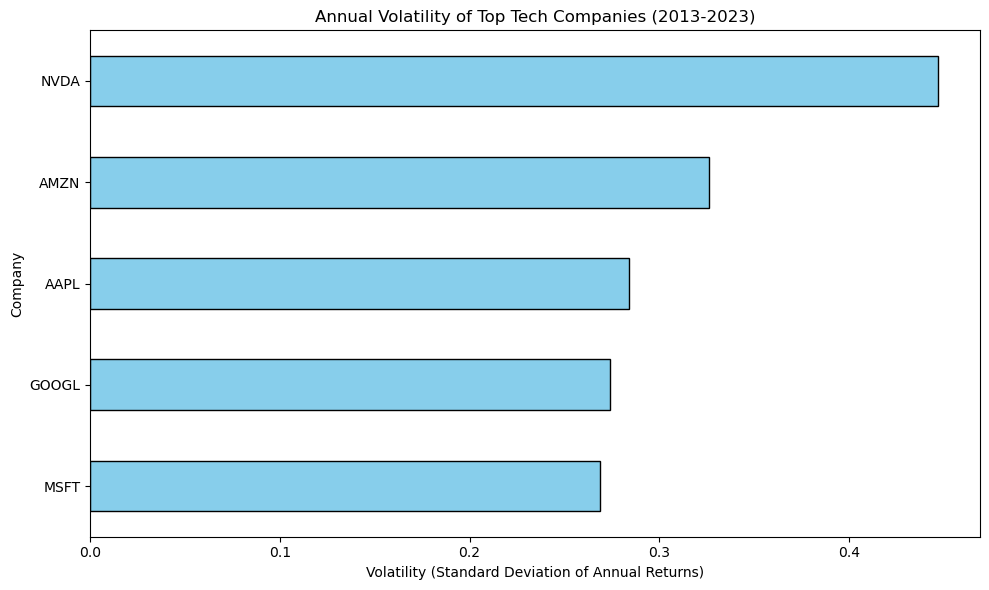

In [18]:
# Define the tickers
tickers = ['AAPL', 'MSFT', 'AMZN', 'NVDA', 'GOOGL']

# Fetch historical adjusted close prices for all tickers at once
data = yf.download(tickers, start='2013-01-01', end='2023-12-31')['Adj Close']

# Plot the stock price trends
plt.figure(figsize=(16, 8))
for ticker in tickers:
    plt.plot(data.index, data[ticker], label=ticker)
plt.title('Stock Price Trends of Top Tech Companies (2013-2023)')
plt.xlabel('Year')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

# Calculate daily returns for each stock
daily_returns = data.pct_change()

# Calculate the standard deviation of daily returns to get volatility
volatility = daily_returns.std()

# Annualize the volatility
trading_days = 252
annual_volatility = volatility * (trading_days ** 0.5)

# Print the annual volatility for each company, sorted by volatility
print("Annual Volatility (sorted):")
print(annual_volatility.sort_values(ascending=False))

# Plot the sorted annual volatility for comparison
plt.figure(figsize=(10, 6))  # Improved plot size for better readability
annual_volatility.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Annual Volatility of Top Tech Companies (2013-2023)')
plt.xlabel('Volatility (Standard Deviation of Annual Returns)')
plt.ylabel('Company')
plt.tight_layout()  # Adjust layout to make room for the labels
plt.show()

# 30-day Rolling Volatility

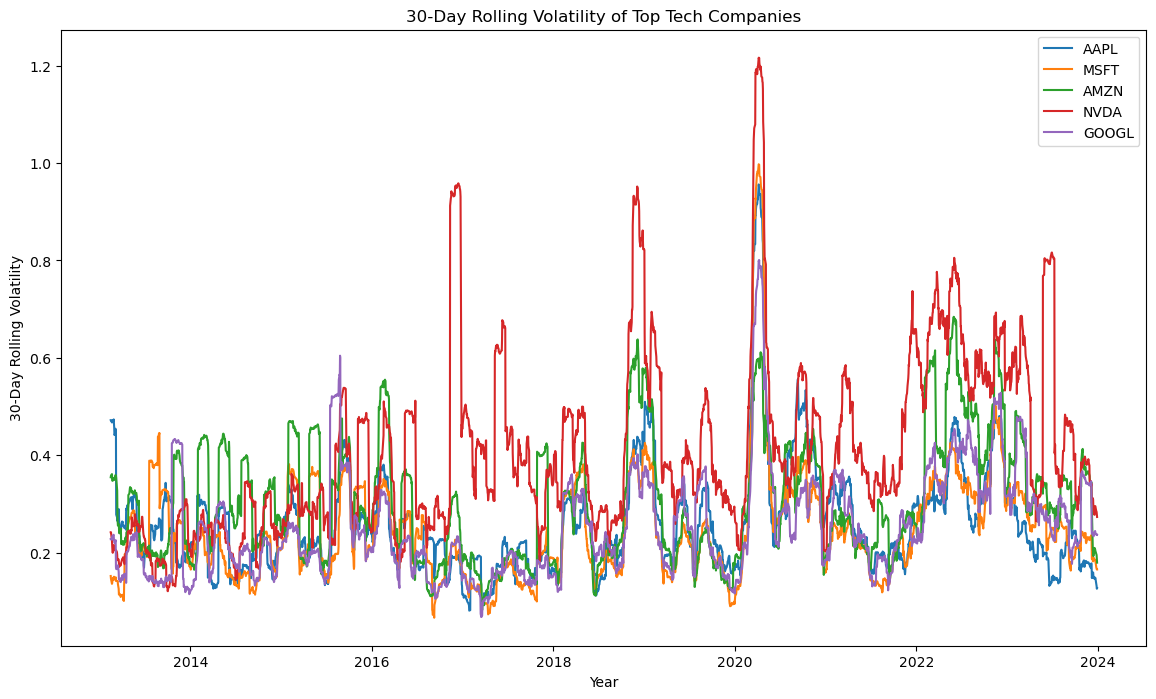

In [20]:
# Calculating 30-day rolling volatility
rolling_volatility = daily_returns.rolling(window=30).std() * np.sqrt(252)

# Ploting the rolling volatility
plt.figure(figsize=(14, 8))
for ticker in tickers:
    plt.plot(rolling_volatility.index, rolling_volatility[ticker], label=ticker)
plt.title('30-Day Rolling Volatility of Top Tech Companies')
plt.xlabel('Year')
plt.ylabel('30-Day Rolling Volatility')
plt.legend()
plt.show()

# Creating a histogram based on Ahmad Bazzi's video

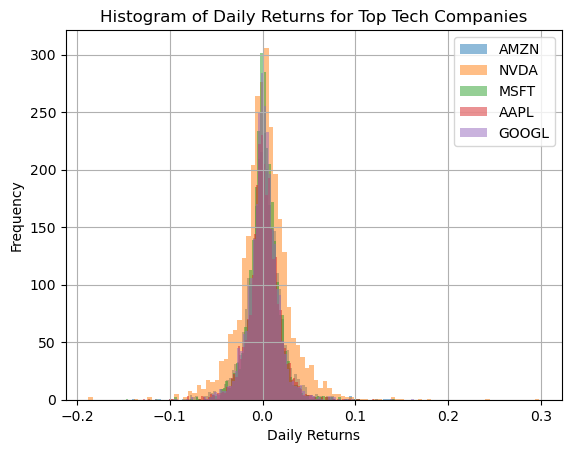

In [28]:
# Plotting histograms for each company's returns
for ticker in tickers:
    daily_returns[ticker].hist(bins=100, alpha=0.5, label=ticker)

plt.title('Histogram of Daily Returns for Top Tech Companies')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.legend()

plt.show()